In [76]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Input, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [13]:
data_dir = "cell_images"
train_path = os.path.join(data_dir, "train")
test_path = os.path.join(data_dir, "test")

## Data

### Exploration

In [23]:
dim1 = []
dim2 = []
for image_filename in os.listdir(os.path.join(test_path, "uninfected")):
    if image_filename != ".ipynb_checkpoints":
        img = imread(os.path.join(test_path, "uninfected", image_filename))
        d1, d2, colors = img.shape
        dim1.append(d1)
        dim2.append(d2)

/Users/sofian.bayed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


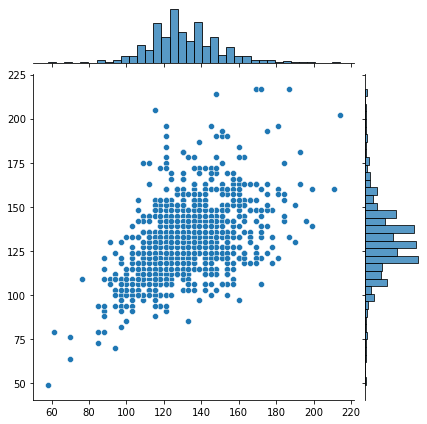

In [24]:
sns.jointplot(dim1, dim2)

In [28]:
np.mean(dim2)

130.75

In [29]:
image_shape = (130, 130, 3)

### Preprocessing

In [48]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode="nearest")

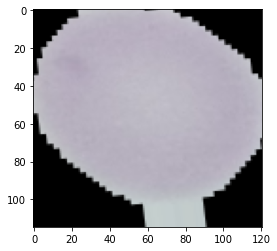

In [49]:
plt.imshow(image_gen.random_transform(img))

In [50]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


## Model

In [60]:
model = Sequential()
model.add(Input(shape=image_shape))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [65]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode="rgb", batch_size=batch_size, class_mode="binary")
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode="rgb", batch_size=batch_size, class_mode="binary", shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2601 images belonging to 2 classes.


In [ ]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

### Prediction

In [80]:
my_image = image.load_img("cell_images/test/uninfected/C1_thinF_IMG_20150604_104919_cell_178.png", target_size=image_shape)

In [84]:
X = np.expand_dims(image.img_to_array(my_image), axis=0)

In [91]:
predictions = model.predict(X)

1/1 [==============================] - 0s 21ms/step


In [92]:
predictions

array([[0.4841392]], dtype=float32)